<div id="top">
<!-- <div style="background-image: url(https://www.emtmadrid.es/getattachment/da3be644-cb9d-44db-8011-e3f40f1c5c34); opacity: 0.2"/> -->
<img src="https://www.gmv.com/sites/default/files/content/image/2021/11/03/115/gmv_rgbredblack.png" alt="GMV Logo" style="width: 200px">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/CEI/LOGOTIPO%20leyenda%20color%20JPG%20p.png" alt="UPM Logo" style="float: right; width: 200px">
<h1><b>QA: Informo dataset 🚦</b></h1>
<h5 style="text-align: right">INESDATA-MOV</h5>
</div>


## Análisis EDA

In [91]:
import os
import statistics
import random
import polars as pl
import pandas as pd
import seaborn as sns
import polars.selectors as cs
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import warnings

warnings.filterwarnings("ignore")

In [92]:
ROOT_PATH = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd()))))
DATA_PATH = os.path.join(ROOT_PATH, "data", "processed")
INFORMO_DATA_PATH = os.path.join(DATA_PATH, "informo")

### Leemos los datos

In [93]:
sample_data = pl.scan_csv(os.path.join(INFORMO_DATA_PATH, "2024", "03","13", f"informo_20240313.csv"),ignore_errors=True)

In [94]:
sample_data.collect()

idelem,descripcion,accesoAsociado,intensidad,ocupacion,carga,nivelServicio,intensidadSat,error,subarea,st_x,st_y,velocidad,datetime,date
i64,str,i64,i64,i64,i64,i64,i64,str,i64,str,str,i64,str,str
6711,null,null,3840,30,105,1,null,"""N""",null,"""442306,1965845…","""4481615,716877…",37,"""2024-03-13 07:…","""2024-03-13"""
10112,"""Arturo Soria -…",4604002,740,4,29,1,2438,"""N""",3203,"""443972,0182132…","""4478986,477391…",null,"""2024-03-13 07:…","""2024-03-13"""
6038,"""Torrelaguna -…",4627002,380,2,28,1,1390,"""N""",3246,"""443981,9555378…","""4478451,452544…",null,"""2024-03-13 07:…","""2024-03-13"""
6039,"""Torrelaguna -…",4628002,840,6,24,0,3000,"""N""",3215,"""443984,1391077…","""4478277,302264…",null,"""2024-03-13 07:…","""2024-03-13"""
6040,"""Torrelaguna -…",4628001,520,5,31,1,2000,"""N""",3215,"""444079,3042011…","""4478026,603977…",null,"""2024-03-13 07:…","""2024-03-13"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
10031,"""Narcís Monturi…",4304002,20,0,2,0,775,"""N""",314,"""440656,7563117…","""4481793,239724…",null,"""2024-03-13 22:…","""2024-03-13"""
10463,"""Av. Ilustració…",null,700,1,14,0,4420,"""N""",314,"""440789,2294428…","""4481734,191243…",null,"""2024-03-13 22:…","""2024-03-13"""
3421,"""Bravo Murillo …",6201004,480,1,16,0,2900,"""N""",304,"""441453,9700354…","""4479675,623063…",null,"""2024-03-13 22:…","""2024-03-13"""


### Variables numéricas

In [95]:
sample_data.select(cs.numeric()).head().collect()

idelem,accesoAsociado,intensidad,ocupacion,carga,nivelServicio,intensidadSat,subarea,velocidad
i64,i64,i64,i64,i64,i64,i64,i64,i64
6711,null,3840,30,105,1,null,null,37
10112,4604002,740,4,29,1,2438,3203,null
6038,4627002,380,2,28,1,1390,3246,null
6039,4628002,840,6,24,0,3000,3215,null
6040,4628001,520,5,31,1,2000,3215,null


### Variables categóricas

In [96]:
sample_data.select(cs.string()).head().collect()

descripcion,error,st_x,st_y,datetime,date
str,str,str,str,str,str
null,"""N""","""442306,1965845…","""4481615,716877…","""2024-03-13 07:…","""2024-03-13"""
"""Arturo Soria -…","""N""","""443972,0182132…","""4478986,477391…","""2024-03-13 07:…","""2024-03-13"""
"""Torrelaguna -…","""N""","""443981,9555378…","""4478451,452544…","""2024-03-13 07:…","""2024-03-13"""
"""Torrelaguna -…","""N""","""443984,1391077…","""4478277,302264…","""2024-03-13 07:…","""2024-03-13"""
"""Torrelaguna -…","""N""","""444079,3042011…","""4478026,603977…","""2024-03-13 07:…","""2024-03-13"""


### Preprocesamiento previo

In [97]:
# Este es el preprocesamiento obtenido del QA
sample_data = sample_data.filter(pl.col('idelem').is_not_null(),pl.col('error')=='N').drop('velocidad','error')
sample_data.head().collect()

idelem,descripcion,accesoAsociado,intensidad,ocupacion,carga,nivelServicio,intensidadSat,subarea,st_x,st_y,datetime,date
i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,str,str
6711,null,null,3840,30,105,1,null,null,"""442306,1965845…","""4481615,716877…","""2024-03-13 07:…","""2024-03-13"""
10112,"""Arturo Soria -…",4604002,740,4,29,1,2438,3203,"""443972,0182132…","""4478986,477391…","""2024-03-13 07:…","""2024-03-13"""
6038,"""Torrelaguna -…",4627002,380,2,28,1,1390,3246,"""443981,9555378…","""4478451,452544…","""2024-03-13 07:…","""2024-03-13"""
6039,"""Torrelaguna -…",4628002,840,6,24,0,3000,3215,"""443984,1391077…","""4478277,302264…","""2024-03-13 07:…","""2024-03-13"""
6040,"""Torrelaguna -…",4628001,520,5,31,1,2000,3215,"""444079,3042011…","""4478026,603977…","""2024-03-13 07:…","""2024-03-13"""


**1. Conversión de variables**

In [98]:
sample_data = sample_data.with_columns(
    pl.col('datetime').map_elements(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")),
    pl.col('date').cast(pl.Date)
)


In [99]:
sample_data.head().collect()

idelem,descripcion,accesoAsociado,intensidad,ocupacion,carga,nivelServicio,intensidadSat,subarea,st_x,st_y,datetime,date
i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,datetime[μs],date
6711,null,null,3840,30,105,1,null,null,"""442306,1965845…","""4481615,716877…",2024-03-13 07:55:08,2024-03-13
10112,"""Arturo Soria -…",4604002,740,4,29,1,2438,3203,"""443972,0182132…","""4478986,477391…",2024-03-13 07:55:08,2024-03-13
6038,"""Torrelaguna -…",4627002,380,2,28,1,1390,3246,"""443981,9555378…","""4478451,452544…",2024-03-13 07:55:08,2024-03-13
6039,"""Torrelaguna -…",4628002,840,6,24,0,3000,3215,"""443984,1391077…","""4478277,302264…",2024-03-13 07:55:08,2024-03-13
6040,"""Torrelaguna -…",4628001,520,5,31,1,2000,3215,"""444079,3042011…","""4478026,603977…",2024-03-13 07:55:08,2024-03-13


**2. Creamos la PK**

In [100]:
sample_data = sample_data.with_columns((pl.col('datetime').cast(pl.String)+"_I"+pl.col('idelem').cast(pl.String)+"_S"+pl.col('subarea').cast(pl.String)).alias('PK'))
sample_data.head().collect()

idelem,descripcion,accesoAsociado,intensidad,ocupacion,carga,nivelServicio,intensidadSat,subarea,st_x,st_y,datetime,date,PK
i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,datetime[μs],date,str
6711,null,null,3840,30,105,1,null,null,"""442306,1965845…","""4481615,716877…",2024-03-13 07:55:08,2024-03-13,null
10112,"""Arturo Soria -…",4604002,740,4,29,1,2438,3203,"""443972,0182132…","""4478986,477391…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6038,"""Torrelaguna -…",4627002,380,2,28,1,1390,3246,"""443981,9555378…","""4478451,452544…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6039,"""Torrelaguna -…",4628002,840,6,24,0,3000,3215,"""443984,1391077…","""4478277,302264…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6040,"""Torrelaguna -…",4628001,520,5,31,1,2000,3215,"""444079,3042011…","""4478026,603977…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"


## Matriz de confusión

In [101]:
numeric_var = ['accesoAsociado', 'intensidad', 'ocupacion', 'carga', 'intensidadSat','nivelServicio']

In [102]:
sample_data_df = sample_data.collect()

In [103]:
matrix = [[0] * len(numeric_var) for _ in range(len(numeric_var))]
for i in range(0,len(numeric_var)):
    for j in range(0,len(numeric_var)):
        matrix[i][j] = sample_data_df.select(pl.corr(numeric_var[i],numeric_var[j])).item()

In [104]:
matrix_corr = pd.DataFrame(matrix, columns=numeric_var,index=numeric_var).apply(lambda col: col.round(4))

In [105]:
matrix_corr

,accesoAsociado,intensidad,ocupacion,carga,intensidadSat,nivelServicio
accesoAsociado,1.0000,0.0806,-0.0571,0.0834,-0.1260,0.0469
intensidad,0.0806,1.0000,0.1169,0.6407,0.5804,0.2241
ocupacion,-0.0571,0.1169,1.0000,0.5722,-0.0734,0.6011
carga,0.0834,0.6407,0.5722,1.0000,-0.0684,0.7278
intensidadSat,-0.1260,0.5804,-0.0734,-0.0684,1.0000,-0.0730
nivelServicio,0.0469,0.2241,0.6011,0.7278,-0.0730,1.0000


<Axes: >

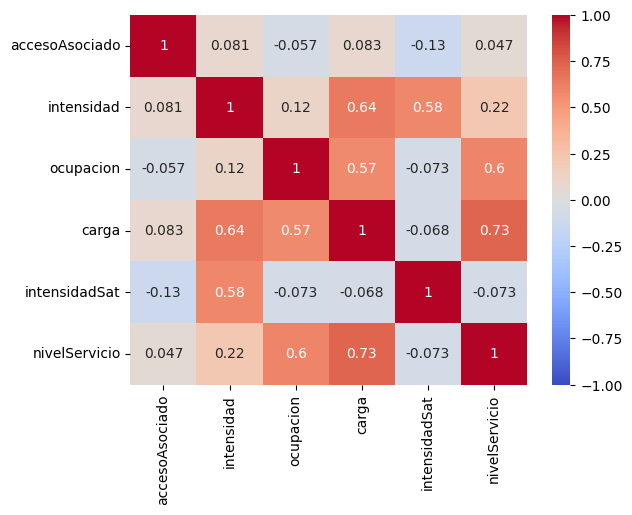

In [106]:
sns.heatmap(matrix_corr, cmap='coolwarm',vmin=-1, vmax=1,annot=True)

In [107]:
matrix_corr.to_csv('/home/mlia/proyectos/data-generation/docs/notebooks/aux/matrix_corr_informo.csv', index=False)

## Estudio por variables

In [108]:
sample_data.describe()

statistic,idelem,descripcion,accesoAsociado,intensidad,ocupacion,carga,nivelServicio,intensidadSat,subarea,st_x,st_y,datetime,date,PK
str,f64,str,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str
"""count""",804296.0,"""754248""",683771.0,804296.0,804296.0,804296.0,803942.0,754248.0,754248.0,"""804296""","""804296""","""804296""","""804296""","""754248"""
"""null_count""",0.0,"""50048""",120525.0,0.0,0.0,0.0,354.0,50048.0,50048.0,"""0""","""0""","""0""","""0""","""50048"""
"""mean""",6723.767336,null,2.5684e6,539.280347,8.622539,27.497086,0.522764,2014.450624,20947.215391,null,null,null,"""2024-03-13""",null
"""std""",2569.768409,null,2.8468e6,727.708937,14.600438,21.320518,0.721251,1172.177108,42749.711245,null,null,null,null,null
"""min""",3395.0,"""(AFO)R. YBARRA…",0.0,-1.0,-1.0,-1.0,-1.0,50.0,0.0,"""429060,7904544…","""4464901,554260…",null,"""2024-03-13""","""2024-03-13 07:…"
"""25%""",4679.0,null,312203.0,127.0,1.0,11.0,0.0,1200.0,1712.0,null,null,null,"""2024-03-13""",null
"""50%""",5917.0,null,843101.0,300.0,4.0,23.0,0.0,1570.0,3101.0,null,null,null,"""2024-03-13""",null
"""75%""",9999.0,null,5.503003e6,660.0,8.0,39.0,1.0,3000.0,3702.0,null,null,null,"""2024-03-13""",null
"""max""",11300.0,"""Ángel Luis Her…",9.905004e6,17900.0,100.0,346.0,3.0,9000.0,130043.0,"""450772,2789719…","""4485212,993851…",null,"""2024-03-13""","""2024-03-13 22:…"


**Variable `intensidad`**

In [109]:
sample_data.group_by(pl.col('intensidad')).count().sort('intensidad',descending=True).head().collect()


intensidad,count
i64,u32
17900,1
16420,1
12060,1
11000,1
9800,1


Identificadores con mayor intensidad

In [110]:
sample_data.group_by(pl.col('idelem')).max().sort('intensidad',descending=True).select(pl.col('idelem'),pl.col('intensidad')).head(10).collect().plot.bar(x='idelem', y='intensidad')

:Bars   [idelem]   (intensidad)

Zonas con mayor intensidad

In [111]:
sample_data.filter(pl.col('descripcion').is_not_null()).group_by(pl.col('descripcion')).max().sort('intensidad',descending=True).select(pl.col('descripcion'),pl.col('intensidad')).head(10).collect().plot.bar(x='descripcion', y='intensidad',rot=20)

:Bars   [descripcion]   (intensidad)

**Variable `ocupacion`**

In [112]:
sample_data.group_by(pl.col('ocupacion')).count().sort('ocupacion',descending=True).head().collect()

ocupacion,count
i64,u32
100,699
99,103
98,285
97,228
96,144


Zonas que se llenan el mayor número de veces

In [113]:
sample_data.filter(pl.col('descripcion').is_not_null()).group_by(pl.col('descripcion'),pl.col('ocupacion')).count().sort('count',descending=True).select(pl.col('descripcion'),pl.col('count')).head(10).collect().plot.bar(x='descripcion', y='count',rot=15,ylabel='Número de veces que tiene ocupación total')

:Bars   [descripcion]   (count)

**Variable `carga`**

Identificadores con mayor carga

In [114]:
sample_data.group_by(pl.col('idelem')).max().sort('carga',descending=True).select(pl.col('idelem'),pl.col('carga')).head(10).collect().plot.bar(x='idelem', y='carga')

:Bars   [idelem]   (carga)

Zonas con mayor carga

In [115]:
sample_data.filter(pl.col('descripcion').is_not_null()).group_by(pl.col('descripcion')).max().sort('carga',descending=True).select(pl.col('descripcion'),pl.col('carga')).head(10).collect().plot.bar(x='descripcion', y='carga',rot=15)

:Bars   [descripcion]   (carga)

**Variable `nivelServicio`**

In [116]:
sample_data.group_by('nivelServicio').count().collect()

nivelServicio,count
i64,u32
null,354
2,68438
1,248108
3,12612
-1,2548
0,472236


In [117]:
sample_data.group_by('nivelServicio').count().sort('nivelServicio').collect().plot.bar(x='nivelServicio',y='count')

:Bars   [nivelServicio]   (count)

Como los valores de esta variable son:
- Fluido = 0
- Lento = 1
- Retenciones = 2
- Congestión = 3
- Sin datos = -1

Nos quedaremos solo con los valores `>=0`

In [118]:
sample_data = sample_data.filter(pl.col('nivelServicio')>=0)

In [119]:
sample_data.head().collect()

idelem,descripcion,accesoAsociado,intensidad,ocupacion,carga,nivelServicio,intensidadSat,subarea,st_x,st_y,datetime,date,PK
i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,datetime[μs],date,str
6711,null,null,3840,30,105,1,null,null,"""442306,1965845…","""4481615,716877…",2024-03-13 07:55:08,2024-03-13,null
10112,"""Arturo Soria -…",4604002,740,4,29,1,2438,3203,"""443972,0182132…","""4478986,477391…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6038,"""Torrelaguna -…",4627002,380,2,28,1,1390,3246,"""443981,9555378…","""4478451,452544…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6039,"""Torrelaguna -…",4628002,840,6,24,0,3000,3215,"""443984,1391077…","""4478277,302264…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6040,"""Torrelaguna -…",4628001,520,5,31,1,2000,3215,"""444079,3042011…","""4478026,603977…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"


**Variable `intensidadSat`**

In [120]:
sample_data.group_by(pl.col('intensidadSat')).count().sort('intensidadSat',descending=True).head().collect()

intensidadSat,count
i64,u32
null,47500
9000,179
7500,179
7200,716
7100,98


Identificadores con mayor intensidad

In [121]:
sample_data.filter(pl.col('intensidadSat').is_not_null()).group_by(pl.col('idelem')).max().sort('intensidadSat',descending=True).select(pl.col('idelem'),pl.col('intensidadSat')).head(10).collect().plot.bar(x='idelem', y='intensidadSat')

:Bars   [idelem]   (intensidadSat)

Zonas con mayor intensidad

In [122]:
sample_data.filter((pl.col('descripcion').is_not_null()) & (pl.col('intensidadSat').is_not_null())).group_by(pl.col('descripcion')).max().sort('intensidadSat',descending=True).select(pl.col('descripcion'),pl.col('intensidadSat')).head(10).collect().plot.bar(x='descripcion', y='intensidadSat',rot=15)

:Bars   [descripcion]   (intensidadSat)

Eliminamos los valores nulos

In [126]:
sample_data = sample_data.filter(pl.col('intensidadSat').is_not_null())
sample_data.head().collect()

idelem,descripcion,intensidad,ocupacion,carga,nivelServicio,intensidadSat,subarea,st_x,st_y,datetime,date,PK
i64,str,i64,i64,i64,i64,i64,i64,str,str,datetime[μs],date,str
10112,"""Arturo Soria -…",740,4,29,1,2438,3203,"""443972,0182132…","""4478986,477391…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6038,"""Torrelaguna -…",380,2,28,1,1390,3246,"""443981,9555378…","""4478451,452544…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6039,"""Torrelaguna -…",840,6,24,0,3000,3215,"""443984,1391077…","""4478277,302264…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6040,"""Torrelaguna -…",520,5,31,1,2000,3215,"""444079,3042011…","""4478026,603977…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"
6041,"""Av. Ramón y Ca…",1400,4,34,1,3380,3215,"""443837,9341675…","""4478283,278897…",2024-03-13 07:55:08,2024-03-13,"""2024-03-13 07:…"


**Variable `accesoAsociado`**

In [124]:
sample_data.group_by('accesoAsociado').count().sort('accesoAsociado',descending=True).head().collect()

accesoAsociado,count
i64,u32
null,70477
9905004,177
9905003,177
9905002,171
9905001,160


Como no tenemos información de esta variable, decidimos eliminarla ya que tampoco posee una gran correlación con el resto de variables

In [125]:
sample_data = sample_data.drop('accesoAsociado')

## Conclusión

Para el primer experimetno terminamos con un dataset con las siguientes columnas:

- `idelem`: str
- `descripcion`: str
- `intensidad`: int
- `ocupacion`: int
- `carga`: int
- `nivelServicio`: int
- `intensidadSat`: int
- `subarea`: str
- `st_x`: str
- `st_y`: str
- `datetime`: datetime
- `date`: date
- `PK`: str
